In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from smartenergy.database import HourlyMeasurements, HourlyPredictions

from IPython.core.display import display, HTML
from jupyterthemes import jtplot
jtplot.style('onedork')

np.warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
display(HTML("<style>.container { width: 1580px !important; }</style>"))

In [2]:
%%time
hourly_measurements = HourlyMeasurements()
stations = hourly_measurements.station_ids
data = hourly_measurements.load().set_index(['solbox_id', 'datetime'])

CPU times: user 991 ms, sys: 123 ms, total: 1.11 s
Wall time: 1.2 s


In [3]:
print(data.shape)
data.head()

(58586, 18)


battery_state_continuous_at_change  \
solbox_id datetime                                                  
190       2018-01-28 11:00:00                                 nan   
          2018-01-28 12:00:00                                 nan   
          2018-01-28 13:00:00                                 nan   
          2018-01-28 14:00:00                                 nan   
          2018-01-28 15:00:00                                 nan   

                               battery_state_continuous_computed  \
solbox_id datetime                                                 
190       2018-01-28 11:00:00                                nan   
          2018-01-28 12:00:00                                nan   
          2018-01-28 13:00:00                                nan   
          2018-01-28 14:00:00                                nan   
          2018-01-28 15:00:00                                nan   

                               battery_state_continuous_theoretical  \
solbox_id datetime                                                    
190       2018-01-28 11:00:00                                   nan   
          2018-01-28 12:00:00                                   nan   
          2018-01-28 13:00:00                                   nan   
          2018-01-28 14:00:00                                   nan   
          2018-01-28 15:00:00                                   nan   

                               battery_state_discrete  battery_state_percent  \
solbox_id datetime                                                             
190       2018-01-28 11:00:00                    2.00                  50.00   
          2018-01-28 12:00:00                     nan                    nan   
          2018-01-28 13:00:00                     nan                    nan   
          2018-01-28 14:00:00                     nan                    nan   
          2018-01-28 15:00:00                     nan                    nan   

                                day  energy_consumption_computed_i  \
solbox_id datetime                                                   
190       2018-01-28 11:00:00 28.00                         649.14   
          2018-01-28 12:00:00   nan                            nan   
          2018-01-28 13:00:00   nan                            nan   
          2018-01-28 14:00:00   nan                            nan   
          2018-01-28 15:00:00   nan                            nan   

                               energy_consumption_i  energy_excess_i  \
solbox_id datetime                                                     
190       2018-01-28 11:00:00                649.14             0.50   
          2018-01-28 12:00:00                   nan              nan   
          2018-01-28 13:00:00                   nan              nan   
          2018-01-28 14:00:00                   nan              nan   
          2018-01-28 15:00:00                   nan              nan   

                               energy_generation_computed_i  \
solbox_id datetime                                            
190       2018-01-28 11:00:00                         53.79   
          2018-01-28 12:00:00                           nan   
          2018-01-28 13:00:00                           nan   
          2018-01-28 14:00:00                           nan   
          2018-01-28 15:00:00                           nan   

                               energy_generation_i  energy_to_battery_i  \
solbox_id datetime                                                        
190       2018-01-28 11:00:00                53.29                 0.00   
          2018-01-28 12:00:00                  nan                  nan   
          2018-01-28 13:00:00                  nan                  nan   
          2018-01-28 14:00:00                  nan                  nan   
          2018-01-28 15:00:00                  nan                  nan   

                               energy_to_batter

## Modelling

In [6]:
### Create features
from smartenergy.ml_service.features import LaggedReadings, Pipeline

lags = 12

feature_pipeline = Pipeline(
    preprocessors=[
    ],
    features=[
        LaggedReadings(lags),
    ]
)

model_matrix = feature_pipeline({'HourlyMeasurements': data.reset_index()})['LaggedReadings']
print(model_matrix.shape)
model_matrix.head()

INFO:2018-09-18 12:15:35,290:root:::Running feature LaggedReadings
(4569, 1435)


,battery_state_discrete_station190,battery_state_discrete_station30,battery_state_discrete_station309,battery_state_discrete_station32,battery_state_discrete_station34,battery_state_discrete_station344,battery_state_discrete_station345,battery_state_discrete_station366,battery_state_discrete_station369,battery_state_discrete_station37,...,temperature_lag_9_station68,temperature_lag_9_station71,temperature_lag_9_station97,date,year,month,week,weekday,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2017-10-30 06:00:00,nan,3.00,nan,3.00,3.00,nan,nan,nan,nan,3.00,...,0.00,nan,nan,2017-10-30,2017,10,44,0,30,6
2017-10-30 07:00:00,nan,3.00,nan,3.00,3.00,nan,nan,nan,nan,3.00,...,0.00,nan,nan,2017-10-30,2017,10,44,0,30,7
2017-10-30 08:00:00,nan,3.00,nan,3.00,3.00,nan,nan,nan,nan,3.00,...,0.00,nan,nan,2017-10-30,2017,10,44,0,30,8
2017-10-30 09:00:00,nan,3.00,nan,3.00,3.00,nan,nan,nan,nan,3.00,...,0.00,nan,nan,2017-10-30,2017,10,44,0,30,9
2017-10-30 10:00:00,nan,3.00,nan,3.00,3.00,nan,nan,nan,nan,3.00,...,0.00,nan,nan,2017-10-30,2017,10,44,0,30,10


In [10]:
%%time
## Analize model fit
from xgboost import XGBRegressor
from random import choice

lagged_features = [f for f in model_matrix.columns if 'lag' in f and 'lag_0' not in f]
common_features = ['year', 'month', 'day', 'hour']
features = lagged_features + common_features
target = 'energy_generation_i'
station = choice(stations)
target_station = target+'_station{}'.format(station)

X, Y = model_matrix.dropna(subset=[target_station])[features], model_matrix.dropna(subset=[target_station])[target_station]
print(X.shape)
print('Fitting model for station {}'.format(station))
xgb = XGBRegressor()
xgb.fit(X, Y)

(1483, 1228)
Fitting model for station 309
CPU times: user 9.68 s, sys: 89.8 ms, total: 9.77 s
Wall time: 9.79 s


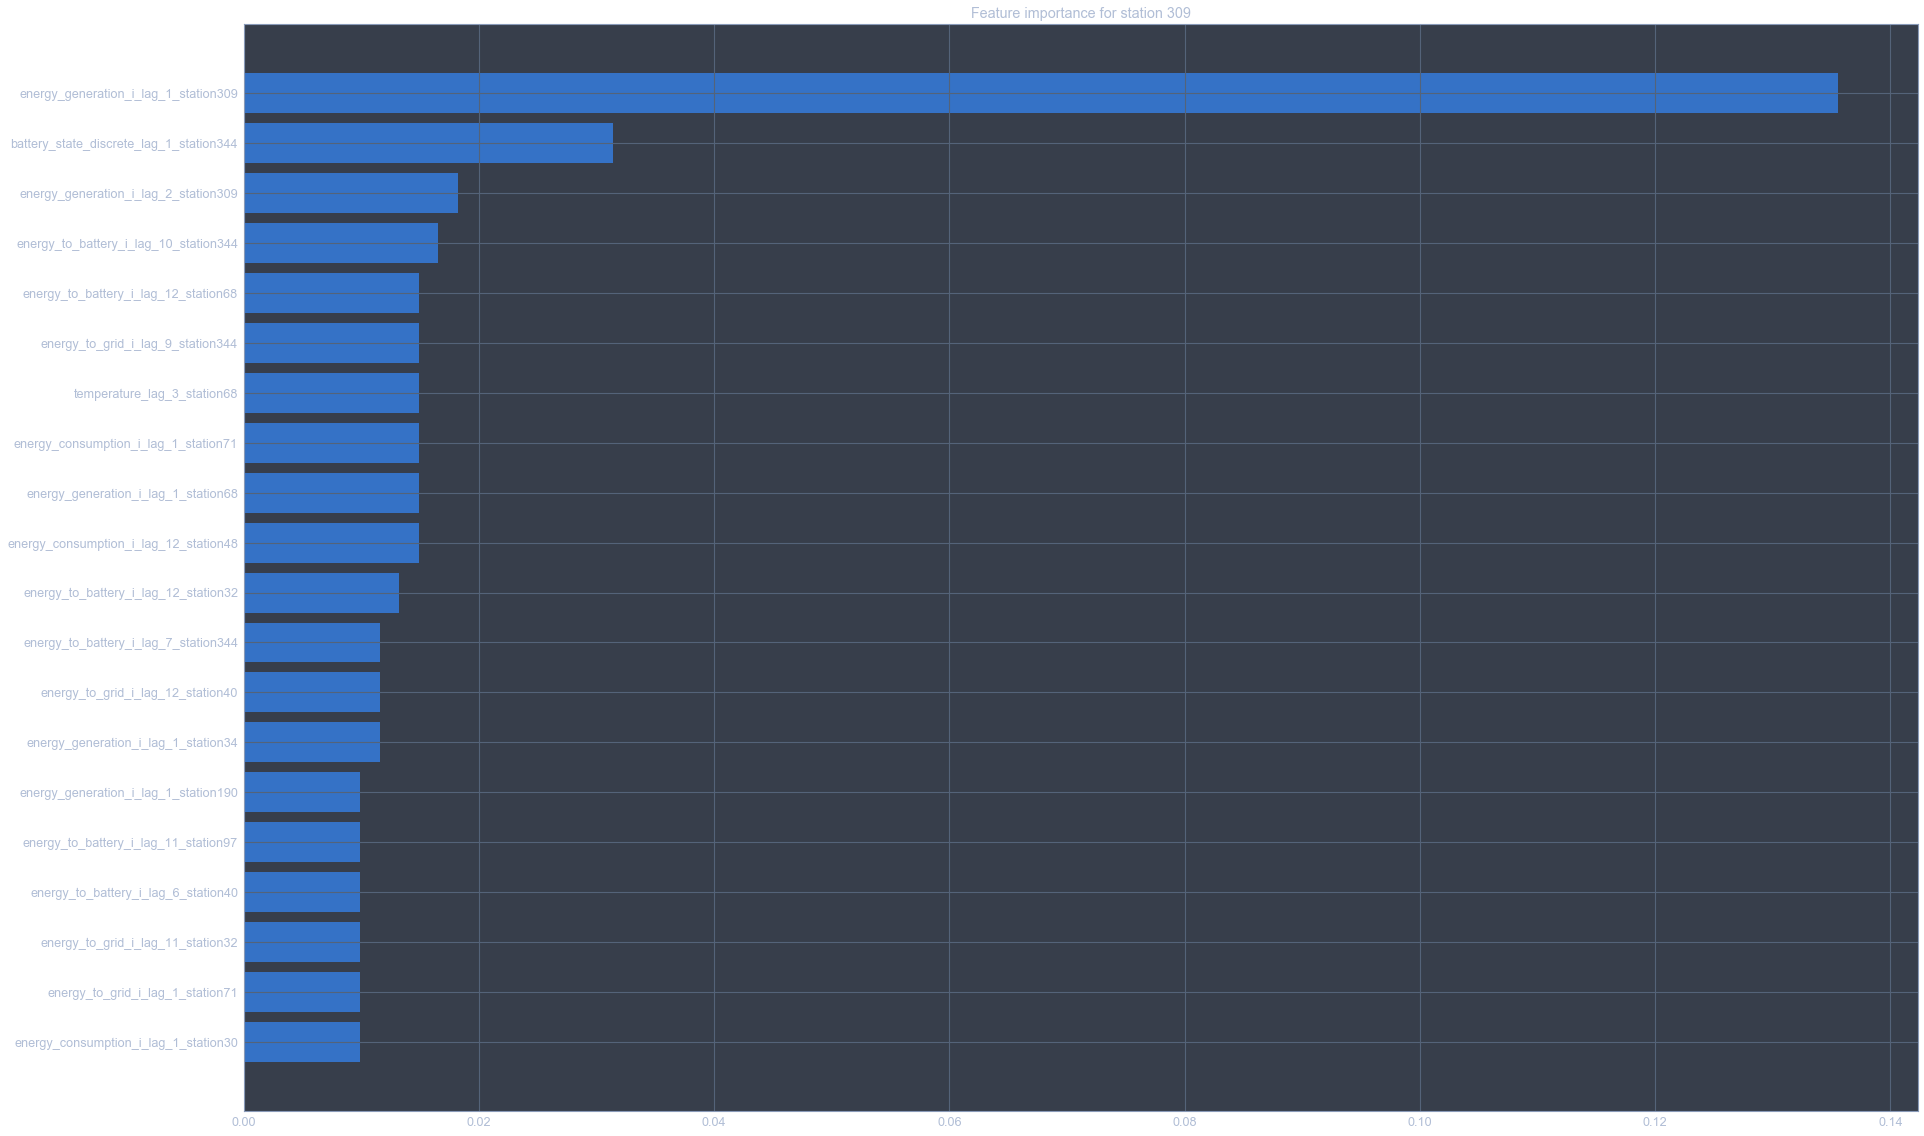

In [11]:
feature_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
important_features = feature_importance[:20][::-1]
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ax.barh(important_features.keys(), important_features.values, align='center')
plt.title('Feature importance for station {}'.format(station))
plt.show()

In [12]:
def n_steps_ahead(data, min_records, n=1):
    return ((range(i), i+n) for i in range(min_records, len(data)-1))

hourly_predictions = HourlyPredictions()
hourly_predictions.drop()

loss_function = lambda x, y: (x - y)**2
losses = list()
for station in stations:
    target_station = target+'_station{}'.format(station)
    X, Y = model_matrix.dropna(subset=[target_station])[features], model_matrix.dropna(subset=[target_station])[target_station]
    min_records = int(len(X)*2/3)
    assert len(X) > min_records, 'Length of data is lower than min_records'
    n = 1
    xgb = XGBRegressor()
    xgb.fit(X.iloc[:min_records], Y.iloc[:min_records])
    print('Model successfully fitted for station {}'.format(station))
    losses_station = list()
    for train_ix, test_ix in n_steps_ahead(X, min_records, n):
        prediction = xgb.predict(X.iloc[[test_ix]])[0].astype(float) # Double brackets to keep it a DataFrame
        hourly_predictions.store(
            xgb.__class__.__name__,
            target,
            station,
            X.iloc[[test_ix]].index[0],
            prediction,
            Y.iloc[[test_ix]].values[0]
        )
        loss = loss_function(prediction, Y.iloc[[test_ix]].values[0]) / np.mean(Y)
        losses_station.append(loss)
    print('Loss for station {}: {}'.format(station, np.mean(losses_station)))
    losses.append(losses_station)


Model successfully fitted for station 190
Loss for station 190: 1069.7587902029295
Model successfully fitted for station 30
Loss for station 30: 493.79785896663304
Model successfully fitted for station 309
Loss for station 309: 7320.032340477649
Model successfully fitted for station 32
Loss for station 32: 4990.587052849478
Model successfully fitted for station 34
Loss for station 34: 3975.720051400448
Model successfully fitted for station 344
Loss for station 344: 1469.9078798382031
Model successfully fitted for station 345
Loss for station 345: 6999.974322121582
Model successfully fitted for station 366
Loss for station 366: 1427.7590483504848
Model successfully fitted for station 369
Loss for station 369: 1281.3558868675573
Model successfully fitted for station 37
Loss for station 37: 2296.330453229042
Model successfully fitted for station 40
Loss for station 40: 15792.470927122098
Model successfully fitted for station 43
Loss for station 43: 169798.70596324652
Model successfully fi

In [13]:
predictions = load_predictions(db.hourly_predictions)

NameError: name 'load_predictions' is not defined

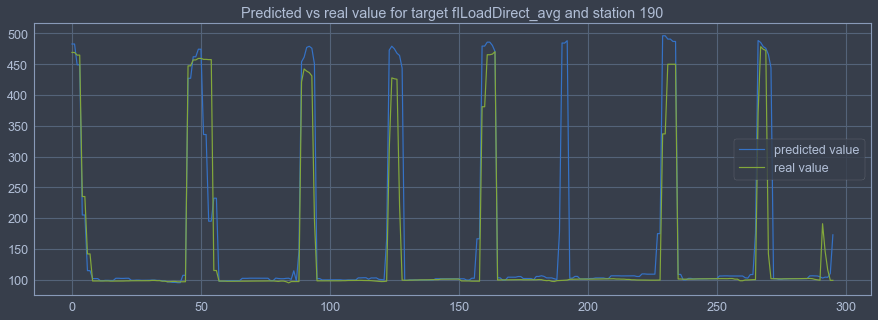

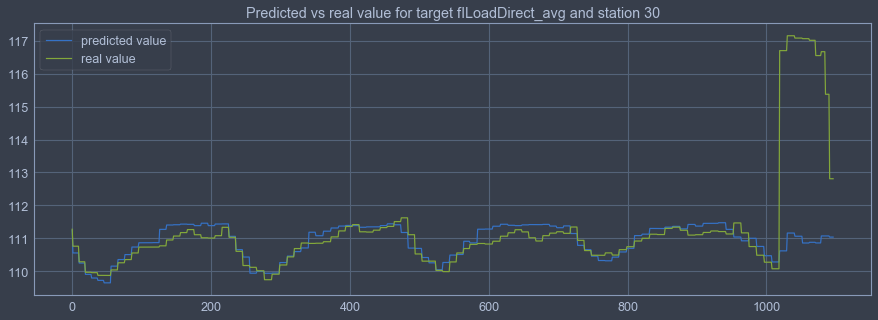

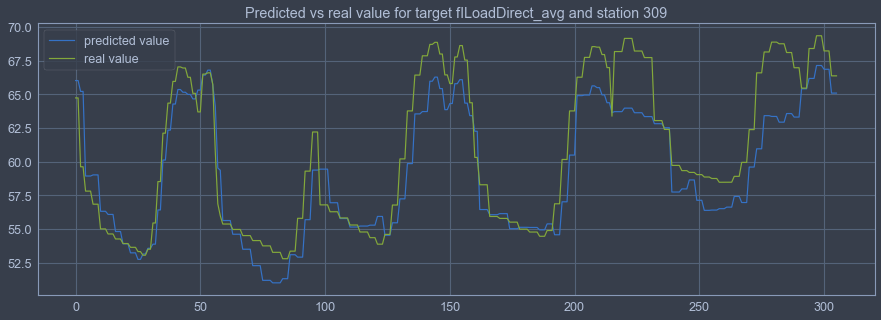

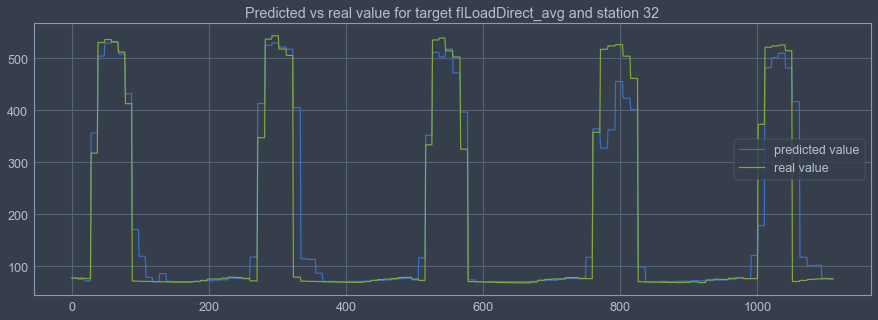

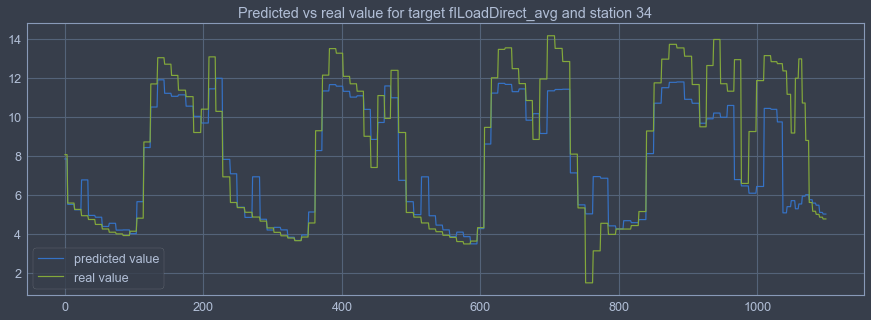

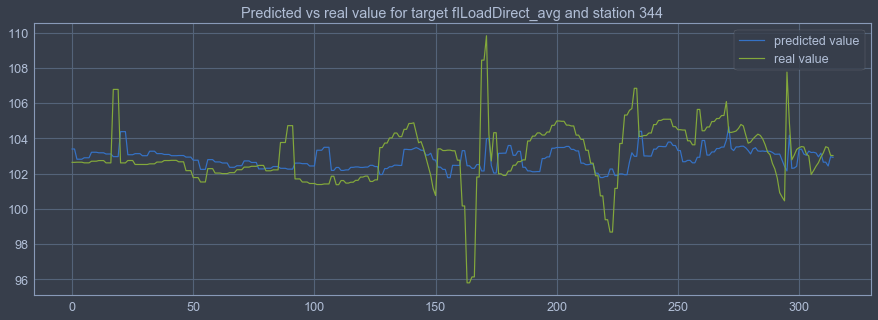

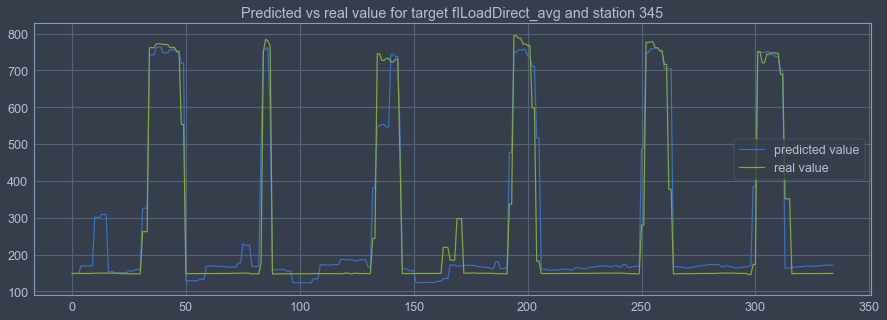

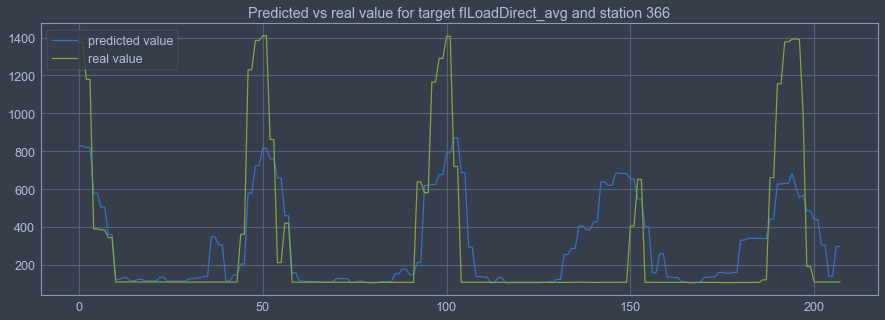

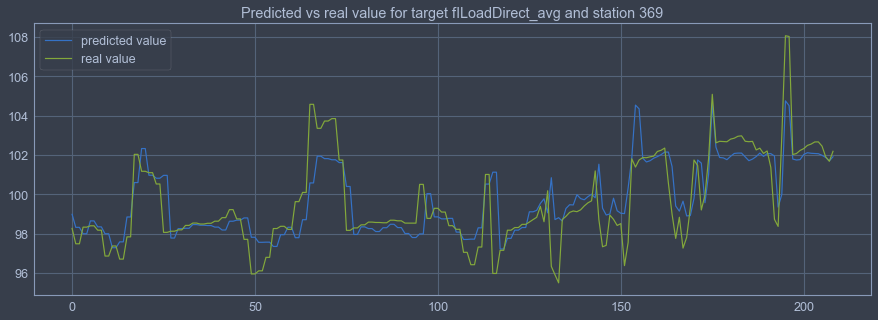

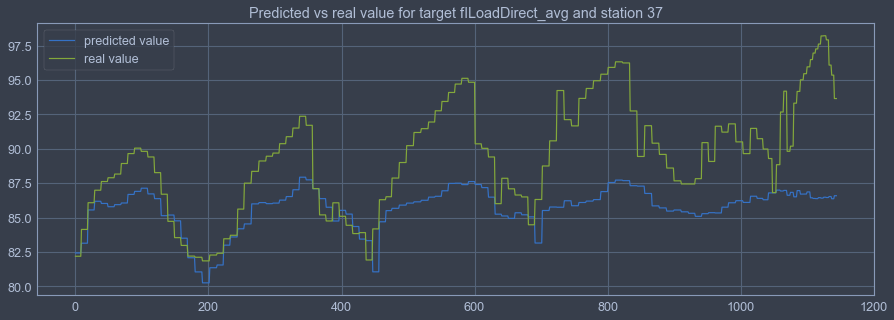

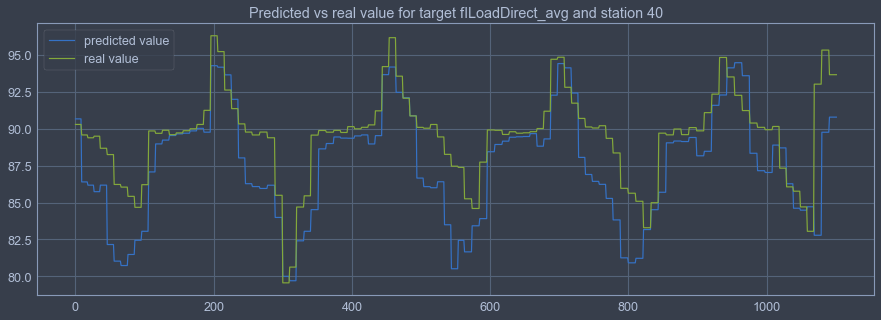

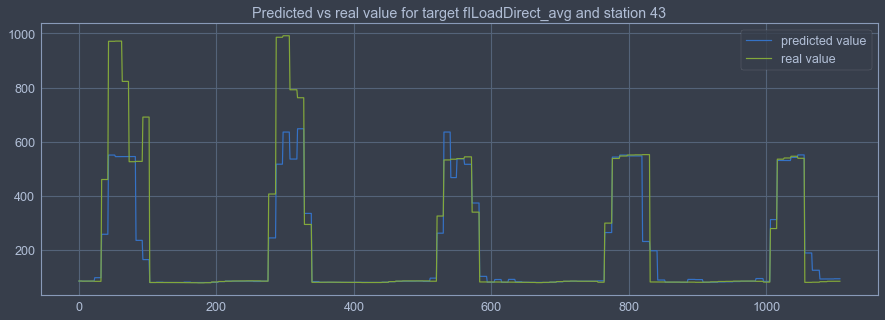

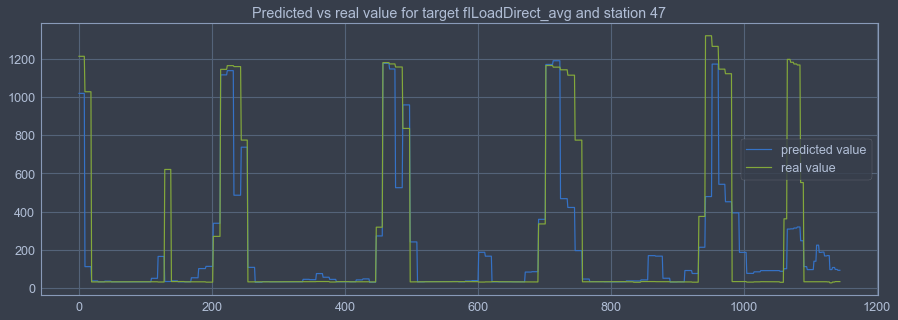

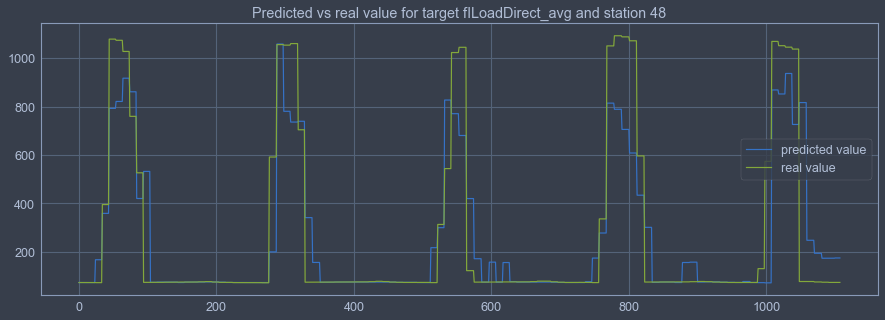

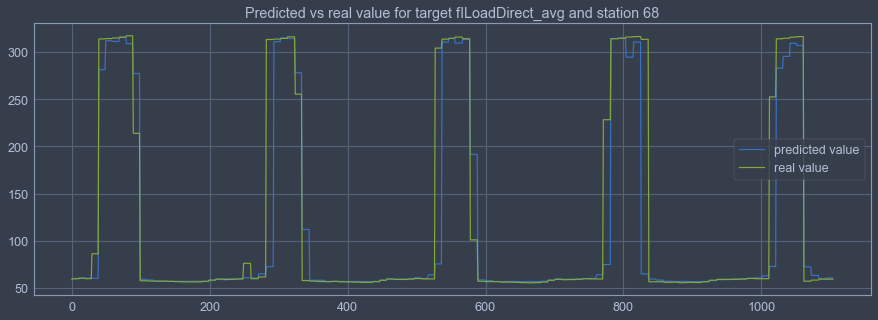

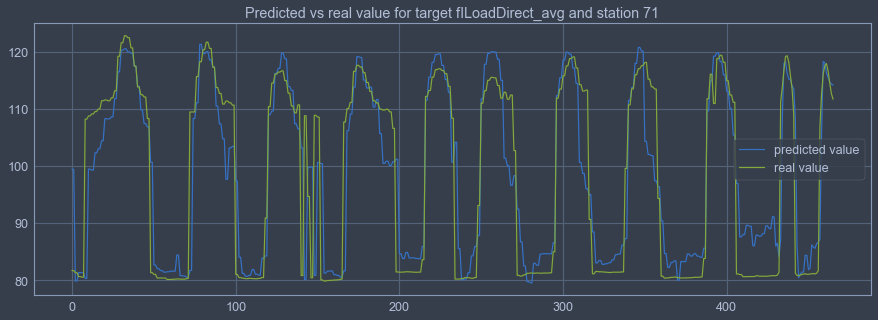

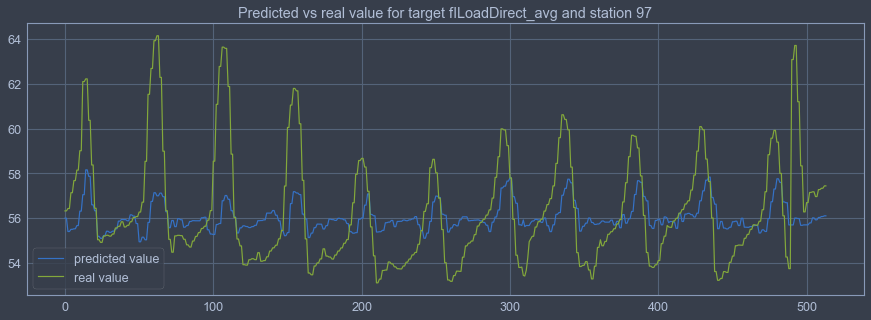

In [274]:
for station in stations:
    plt.figure(figsize=(15, 5))
    plt.plot(predictions.loc[station, 'prediction'].values, label='predicted value')
    plt.plot(predictions.loc[station, 'ground_truth'].values, label='real value')
        
    plt.title('Predicted vs real value for target {} and station {}'.format(target, station))
    plt.legend()
    plt.show()